In [1]:
import numpy as np
import sympy as sp

In [2]:
t, m, g, k = sp.symbols('t, m, g, k')

In [3]:
# get independent variables symbols
the1 = sp.Function(r'\theta_1')(t)
the2 = sp.Function(r'\theta_2')(t)

r1 = sp.Function(r'r_1')(t)
r2 = sp.Function(r'r_2')(t)

# get their derivatives symbols
the1_d = sp.diff(the1, t)
the1_dd = sp.diff(the1_d, t)

the2_d = sp.diff(the2, t)
the2_dd = sp.diff(sp.diff(the2, t), t)

r1_d = sp.diff(r1, t)
r1_dd = sp.diff(sp.diff(r1, t), t)

r2_d = sp.diff(r2, t)
r2_dd = sp.diff(sp.diff(r2, t), t)

In [4]:
# x1 = sp.Function(r'x_1')
# y1 = sp.Function(r'y_1')
# 
# x2 = sp.Function(r'x_2')
# y2 = sp.Function(r'y_2')
# 
# x1 = x1(the1, r1)
# y1 = y1(the1, r1)
# x2 = x2(the1, r1, the2, r2)
# y2 = y2(the1, r1, the2, r2)

In [5]:
# get cartesian coords from r and theta


x1 = (1+r1)*sp.cos(the1)
y1 = -(1+r1)*sp.sin(the1)
x2 = (1+r1)*sp.cos(the1) + (1+r2)*sp.cos(the2)
y2 = -(1+r1)*sp.sin(the1)-(1+r2)*sp.sin(the2)

# small angles taylor series
# x1 = (1+r1)*(1 - the1**2 / 2)
# y1 = -(1+r1)*(the1)
# x2 = (1+r1)*(1 - the1**2 / 2) + (1+r2)*(1 - the2**2 / 2)
# y2 = -(1+r1)*the1-(1+r2)*the2

In [6]:
T = 1/2 * m * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2 + \
               sp.diff(x2, t)**2 + + sp.diff(y2, t)**2)
V = m*g*y1 + m*g*y2 + 1/2 * k * r1**2 + 1/2 * k * r2**2
L = T - V

In [7]:
L

-g*m*((-r_1(t) - 1)*sin(\theta_1(t)) - (r_2(t) + 1)*sin(\theta_2(t))) - g*m*(-r_1(t) - 1)*sin(\theta_1(t)) - 0.5*k*r_1(t)**2 - 0.5*k*r_2(t)**2 + 0.5*m*(((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t))**2 + (-(r_1(t) + 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) + cos(\theta_1(t))*Derivative(r_1(t), t))**2 + ((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (-r_2(t) - 1)*cos(\theta_2(t))*Derivative(\theta_2(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t) - sin(\theta_2(t))*Derivative(r_2(t), t))**2 + (-(r_1(t) + 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (r_2(t) + 1)*sin(\theta_2(t))*Derivative(\theta_2(t), t) + cos(\theta_1(t))*Derivative(r_1(t), t) + cos(\theta_2(t))*Derivative(r_2(t), t))**2)

In [8]:
LE1 = sp.diff(L, the1) - sp.diff(sp.diff(L, the1_d), t)
LE1 = LE1.simplify()

In [9]:
LE2 = sp.diff(L, the2) - sp.diff(sp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [10]:
LE3 = sp.diff(L, r1) - sp.diff(sp.diff(L, r1_d), t)
LE3 = LE3.simplify()

In [11]:
LE4 = sp.diff(L, r2) - sp.diff(sp.diff(L, r2_d), t)
LE4 = LE4.simplify()

In [12]:
LE1

m*(2.0*g*r_1(t)*cos(\theta_1(t)) + 2.0*g*cos(\theta_1(t)) - 2.0*r_1(t)**2*Derivative(\theta_1(t), (t, 2)) - 1.0*r_1(t)*r_2(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*r_1(t)*r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 1.0*r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 1.0*r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(r_2(t), (t, 2)) - 2.0*r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)*Derivative(r_2(t), t) - 1.0*r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 4.0*r_1(t)*Derivative(\theta_1(t), t)*Derivative(r_1(t), t) - 4.0*r_1(t)*Derivative(\theta_1(t), (t, 2)) - 1.0*r_2(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 1.0*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 1.0*sin(\theta_1(t) - \theta_2(t))*Derivative(r_2(t), (t, 2)) - 2.0*cos(\theta_1(t) - \the

# Analytical solution (does not work)

In [13]:
from sympy import Eq

dsols = sp.dsolve(
  (Eq(LE1, 0), Eq(LE2, 0), Eq(LE3, 0), Eq(LE4, 0)),
  ics={
    the1.subs(t, 0): 0,
    the1_d.subs(t, 0): 0,
    the2.subs(t, 0): 0,
    the2_d.subs(t, 0): 0,
  }
)

AttributeError: 'list' object has no attribute 'args'

# Numerical integration

In [14]:
sols = sp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, r1_dd, r2_dd),
                simplify=False, rational=False)

In [15]:
dw1dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the1_dd])
dthe1dt_f = sp.lambdify(the1_d, the1_d)

dw2dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the2_dd])
dthe2dt_f = sp.lambdify(the2_d, the2_d)

dv1dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r1_dd])
dr1dt_f = sp.lambdify(r1_d, r1_d)

dv2dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r2_dd])
dr2dt_f = sp.lambdify(r2_d, r2_d)

In [16]:
def dSdt(S, t):
    the1, w1, the2, w2, r1, v1, r2, v2 = S
    return [
        dthe1dt_f(w1),
        dw1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dthe2dt_f(w2),
        dw2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr1dt_f(v1),
        dv1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr2dt_f(v2),
        dv2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
    ]

In [17]:
t = np.linspace(0, 20, 1000)
g = 9.81
m = 1
k = 10

In [18]:
from scipy.integrate import odeint

ans = odeint(dSdt, y0=[np.pi/2, 0 ,(3/2)*np.pi/2,0,0,5,0,5], t=t)

In [19]:
def get_x1y1x2y2(the1, the2, r1, r2):
    return ((1+r1)*np.cos(the1),
            -(1+r1)*np.sin(the1),
            (1+r1)*np.cos(the1) + (1+r2)*np.cos(the2),
            -(1+r1)*np.sin(the1)-(1+r2)*np.sin(the2)
    )

x1, y1, x2, y2 = get_x1y1x2y2(ans.T[0], ans.T[2], ans.T[4], ans.T[6])

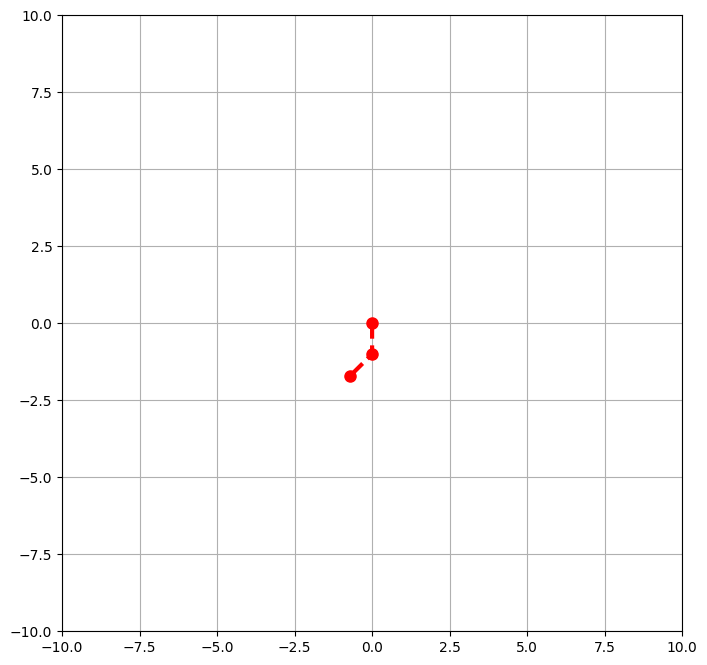

In [20]:
from matplotlib import animation
import matplotlib.pyplot as plt

def animate(frame):
    ln1.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('heavy_spring.gif', writer='pillow', fps=50)